In [1]:
import pandas as pd
import numpy as np
import easygui 
# msg = '请点选本月出库文件"原材料出库2022-03.xlsx"！'
# fname = easygui.fileopenbox(msg, title=msg)
# df = pd.read_excel(fname)

In [3]:
print(df)

          科目编码     科目名称        出库          单价          金额
0   1403001002  90g双胶大度      -3.2  242.831390     -777.06
1   1403001003  70g双胶正度      88.0  164.963402    14516.78
2   1403001004  98g双胶大度       3.1  287.012408      889.74
3   1403001005  98g双胶正度      43.0  248.313486    10677.48
4   1403001007  90g双胶正度      14.0  213.290235     2986.06
..         ...      ...       ...         ...         ...
76  1403006008       胶套   -2335.0    0.522452    -1219.92
77  1403006009      空白袋  317020.0    0.048854    15487.58
78  1403006010       书套   73600.0    0.049983     3678.73
79     包装物  小计      NaN       NaN         NaN   529591.86
80         原材料       合计       NaN         NaN  9170320.44

[81 rows x 5 columns]


In [10]:
df1=df.astype({'科目名称':'object'})
df1 =  df[df['科目名称'].str.contains('计')==False]
df1 =  df1[df1['科目编码'].str.contains('计')==False]
print(df1)

          科目编码     科目名称        出库          单价        金额
0   1403001002  90g双胶大度      -3.2  242.831390   -777.06
1   1403001003  70g双胶正度      88.0  164.963402  14516.78
2   1403001004  98g双胶大度       3.1  287.012408    889.74
3   1403001005  98g双胶正度      43.0  248.313486  10677.48
4   1403001007  90g双胶正度      14.0  213.290235   2986.06
..         ...      ...       ...         ...       ...
74  1403006006      打包带      56.0   88.697383   4967.05
75  1403006007      缠绕膜     108.0   46.036114   4971.90
76  1403006008       胶套   -2335.0    0.522452  -1219.92
77  1403006009      空白袋  317020.0    0.048854  15487.58
78  1403006010       书套   73600.0    0.049983   3678.73

[76 rows x 5 columns]


In [8]:
df2 = pd.read_clipboard()
df2 = df2[~df2['科目名称'].str.contains('计')]
print(df2)

       科目名称         金额
0   55g双胶正度   13334.00
1  190g白卡大度   12720.51
2       卷筒纸  227615.44
3       热熔胶    1055.24


In [9]:
total = sum(df2['金额'])
print(total)

254725.19


In [11]:
df2.shape[0]

4

In [13]:
df3 = df2
df3 = df2.append({'科目名称': '合计','金额':total}, ignore_index=True)

In [14]:
df3

,科目名称,金额
0,55g双胶正度,13334.00
1,190g白卡大度,12720.51
2,卷筒纸,227615.44
3,热熔胶,1055.24
4,合计,254725.19


In [31]:
df3 = df1.loc[:,['科目名称','科目编码','单价']]
print(df3)
          

       科目名称        科目编码          单价
0   90g双胶大度  1403001002  242.831390
1   70g双胶正度  1403001003  164.963402
2   98g双胶大度  1403001004  287.012408
3   98g双胶正度  1403001005  248.313486
4   90g双胶正度  1403001007  213.290235
..      ...         ...         ...
74      打包带  1403006006   88.697383
75      缠绕膜  1403006007   46.036114
76       胶套  1403006008    0.522452
77      空白袋  1403006009    0.048854
78       书套  1403006010    0.049983

[76 rows x 3 columns]


In [38]:
df2_df1 = pd.merge(df2,df3,how='left',on = '科目名称')
print(df2_df1)

       科目名称         金额        科目编码          单价
0   55g双胶正度   13334.00  1403001009  118.002676
1  190g白卡大度   12720.51  1403001302  556.179733
2       卷筒纸  227615.44  1403001501    5.024315
3       热熔胶    1055.24  1403003004   22.521851


In [39]:
df2_df1['数量'] = round(df2_df1['金额']/df2_df1['单价'],0)
print(df2_df1)

       科目名称         金额        科目编码          单价       数量
0   55g双胶正度   13334.00  1403001009  118.002676    113.0
1  190g白卡大度   12720.51  1403001302  556.179733     23.0
2       卷筒纸  227615.44  1403001501    5.024315  45303.0
3       热熔胶    1055.24  1403003004   22.521851     47.0


In [40]:
df2_df1['金额'] = round(df2_df1['数量']*df2_df1['单价'],2)
print(df2_df1)

       科目名称         金额        科目编码          单价       数量
0   55g双胶正度   13334.30  1403001009  118.002676    113.0
1  190g白卡大度   12792.13  1403001302  556.179733     23.0
2       卷筒纸  227616.54  1403001501    5.024315  45303.0
3       热熔胶    1058.53  1403003004   22.521851     47.0


In [41]:
df2_df1  = df2_df1.loc[:,['科目编码','科目名称','数量','单价','金额']]
print(df2_df1)

         科目编码      科目名称       数量          单价         金额
0  1403001009   55g双胶正度    113.0  118.002676   13334.30
1  1403001302  190g白卡大度     23.0  556.179733   12792.13
2  1403001501       卷筒纸  45303.0    5.024315  227616.54
3  1403003004       热熔胶     47.0   22.521851    1058.53


In [42]:
df2_df1 = df2_df1.set_index(['科目编码','科目名称'])
df2_df1

,,数量,单价,金额
科目编码,科目名称,,,
1403001009,55g双胶正度,113.0,118.002676,13334.30
1403001302,190g白卡大度,23.0,556.179733,12792.13
1403001501,卷筒纸,45303.0,5.024315,227616.54
1403003004,热熔胶,47.0,22.521851,1058.53


In [43]:
df2_df1 = df2_df1*(-1)
df2_df1

,,数量,单价,金额
科目编码,科目名称,,,
1403001009,55g双胶正度,-113.0,-118.002676,-13334.30
1403001302,190g白卡大度,-23.0,-556.179733,-12792.13
1403001501,卷筒纸,-45303.0,-5.024315,-227616.54
1403003004,热熔胶,-47.0,-22.521851,-1058.53


In [44]:
df2_df1['单价']=0

In [45]:
df2_df1

,,数量,单价,金额
科目编码,科目名称,,,
1403001009,55g双胶正度,-113.0,0,-13334.30
1403001302,190g白卡大度,-23.0,0,-12792.13
1403001501,卷筒纸,-45303.0,0,-227616.54
1403003004,热熔胶,-47.0,0,-1058.53


In [46]:
df2_df1 = df2_df1.reset_index()
df2_df1

,科目编码,科目名称,数量,单价,金额
0,1403001009,55g双胶正度,-113.0,0,-13334.30
1,1403001302,190g白卡大度,-23.0,0,-12792.13
2,1403001501,卷筒纸,-45303.0,0,-227616.54
3,1403003004,热熔胶,-47.0,0,-1058.53


In [51]:
df4 = pd.concat([df1,df2_df1])
df5 = df4.groupby(['科目编码','科目名称']).sum()
df5

,,出库,单价,金额,数量
科目编码,科目名称,,,,
1403001002,90g双胶大度,-3.2,242.831390,-777.06,0.0
1403001003,70g双胶正度,88.0,164.963402,14516.78,0.0
1403001004,98g双胶大度,3.1,287.012408,889.74,0.0
1403001005,98g双胶正度,43.0,248.313486,10677.48,0.0
1403001007,90g双胶正度,14.0,213.290235,2986.06,0.0
...,...,...,...,...,...
1403006006,打包带,56.0,88.697383,4967.05,0.0
1403006007,缠绕膜,108.0,46.036114,4971.90,0.0
1403006008,胶套,-2335.0,0.522452,-1219.92,0.0


In [100]:
def leibie(x):                      #加类别！以便汇总！
    if x >= 1403001001 and x < 1403002001:
        lei = '001纸'                        #加001等是为了排序方便！最后去掉即可！
    elif x >= 1403002001 and x < 1403003001:
        lei = '002灰板'
    elif x >= 1403003001 and x < 1403006001:
        lei = '003辅料'
    else:
        lei = '004包装物'
    return lei

def xiaoji(x):
    if x['科目编码'] in [None, '']:
        ji = '  ' + x['leibie'][3:] + '  ' + '小计'    #加空格使之美观！不过也增加后面处理难度
    else:
        ji = x['科目编码']
    return ji

df6 = df5.reset_index()
df6 = df6.astype({'科目编码':'int'})
df6.insert(0, 'leibie', df6['科目名称'])   #后面插入None不行！
df6.leibie = df6['科目编码'].map(leibie)
df6
table = pd.pivot_table(df6, index=['leibie', '科目编码', '科目名称'], aggfunc='sum')
datas = []
grouped = table.groupby('leibie')
for k, d in grouped:
    j = d.append(d.sum().rename((k, '', '')))    #关键操作，从百度上照搬！
    datas.append(j)
df_total = pd.concat(datas)
df_total
out = df_total.append(table.sum().rename(('005原材料', '', '合计')))
# out.index = pd.MultiIndex.from_tuples(out.index)
out
out = out.reset_index()
out
out1 = out.assign(科目编码=out.apply(lambda x: xiaoji(x), axis=1))  #axis很重要
out1
out2 = out1.iloc[:, 1:]
out3  = out2
out3
out3 = out3[out3.金额 != 0]

out3['科目编码'] = out3['科目编码'].astype('str')    #强行转换格式
out3.iloc[-1,0] = '原材料'
out3
out3 = out3.set_index('科目编码')
out3
for j in ['  纸  小计','  灰板  小计','  辅料  小计','  包装物  小计','原材料']:
    for i in ['出库','单价']:
        out3.at[j, i] = None    # =''不行!将出库、单价的合计数，更改为空！
out3 = out3.reset_index()
out3


,科目编码,科目名称,出库,单价,数量,金额
0,1403001002,90g双胶大度,-3.2,242.831390,0.0,-777.06
1,1403001003,70g双胶正度,88.0,164.963402,0.0,14516.78
2,1403001004,98g双胶大度,3.1,287.012408,0.0,889.74
3,1403001005,98g双胶正度,43.0,248.313486,0.0,10677.48
4,1403001007,90g双胶正度,14.0,213.290235,0.0,2986.06
...,...,...,...,...,...,...
76,1403006008,胶套,-2335.0,0.522452,0.0,-1219.92
77,1403006009,空白袋,317020.0,0.048854,0.0,15487.58
78,1403006010,书套,73600.0,0.049983,0.0,3678.73
79,包装物 小计,,NaN,NaN,0.0,529591.86


In [16]:
import pandas as pd

(
    pd.read_excel('https://www.gairuo.com/file/data/dataset/team.xlsx')
    .groupby('team')
    .first()
    .assign(avg=lambda x: x.mean(1))
    .reset_index()
    .set_index('name')
    .query('avg>60')
    .loc[:,['team', 'avg']]

)



,team,avg
name,,
Acob,B,64.50
Oah,D,65.25


In [1]:
import pandas as pd
df = pd.read_clipboard()
df

,date,gmv
0,2020-11-10,100
1,2020-11-09,88
2,2020-11-08,77
3,2020-11-07,65
4,2020-11-06,57
5,2020-11-05,68
6,2019-11-10,44
7,2019-11-09,57
8,2019-11-08,34
9,2019-11-07,88


In [2]:
( 
    df.astype({'date': 'datetime64[ns]'}) 
    .set_index('date') 
)

,gmv
date,
2020-11-10,100
2020-11-09,88
2020-11-08,77
2020-11-07,65
2020-11-06,57
2020-11-05,68
2019-11-10,44
2019-11-09,57
2019-11-08,34


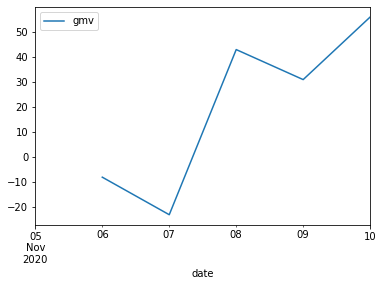

In [12]:
( 
    df.astype({'date': 'datetime64[ns]'}) 
    .set_index('date') 
    .groupby([lambda x: x.month, lambda x: x.day]) 
    .apply(lambda x: x.diff(-1))
    .loc[lambda x:x.index.year==2020]
    .plot()
)

In [10]:
import pandas as pd
df = pd.read_clipboard()
df

,A,B,C,D
0,a,b1,c,2001
1,a,b1,c,2003
2,a,b1,c,2005
3,a,b2,c,2001
4,a,b2,c,2002
5,a,b2,c,2003
6,a,b2,c,2004


In [12]:
df.pivot(index=['A','B','C'],columns='D',values='D')

ValueError: Length of passed values is 7, index implies 3.

In [7]:
df.pivot(index=['A', 'B', 'C'], column='D', values='D')

TypeError: pivot() got an unexpected keyword argument 'column'

In [17]:
( 
    df.groupby(['A', 'B', 'C']) 
    .apply(lambda x: ','.join(x.D.astype(str))) 
)

A  B   C
a  b1  c         2001,2003,2005
   b2  c    2001,2002,2003,2004
dtype: object

In [18]:
( 
    df.groupby(['A', 'B', 'C']) 
    .apply(lambda x: ','.join(x.D.astype(str))) 
    .str.split(',', expand=True) 
)

0     1     2     3
A B  C                        
a b1 c  2001  2003  2005  None
  b2 c  2001  2002  2003  2004

In [19]:
df = pd.DataFrame({ 'A':[1,2,4,5,-6], 'B':[2,-1,8,2, 1], 'C':[2,-1,8,2, 1] }, index=['x', 'y', 'z', 'h', 'i'] )
df

,A,B,C
x,1,2,2
y,2,-1,-1
z,4,8,8
h,5,2,2
i,-6,1,1


In [21]:
( 
    df[df==df.max().max()] # 查出最大值 
    .dropna(how='all') # 删除全为空的行 
    .dropna(how='all', axis=1) # 删除全为空的列 
)

,B,C
z,8.0,8.0


In [22]:
df = pd.read_clipboard()
df

,地区,最后一例确诊日期
0,顺义区,2020-02-08
1,平谷区,Nan
2,昌平区,2020-08-06
3,大兴区,2020-06-30
4,密云区,2020-02-11
5,石景山区,2020-06-14
6,海淀区,2020-06-25
7,东城区,2020-06-16
8,门头沟区,2020-06-15
9,房山区,2020-06-15


In [24]:
( 
    df.replace('Nan', pd.NaT) # 将缺失值转为空时间 # 将确诊日期转为时间格式 
    .assign(最后一例确诊日期=lambda x: x['最后一例确诊日期'].astype('datetime64[ns]')) # 增加无报告病例天数列，当日与确诊日期相减 
    .assign(无报告病例天数=lambda x: pd.Timestamp('2020-11-16')-x['最后一例确诊日期']) # 计算出天数 
    #.assign(无报告病例天数=lambda x: x['无报告病例天数'].dt.days) # 排序，空值在前，重排索引 
    #.sort_values('无报告病例天数', ascending=False, na_position='first', ignore_index=True) 
)

,地区,最后一例确诊日期,无报告病例天数
0,顺义区,2020-02-08,282 days
1,平谷区,NaT,NaT
2,昌平区,2020-08-06,102 days
3,大兴区,2020-06-30,139 days
4,密云区,2020-02-11,279 days
5,石景山区,2020-06-14,155 days
6,海淀区,2020-06-25,144 days
7,东城区,2020-06-16,153 days
8,门头沟区,2020-06-15,154 days
9,房山区,2020-06-15,154 days


In [34]:
df = pd.read_clipboard()
df

,节日,开始日期,结束日期
0,元旦,2020-01-01,2020-01-01
1,除夕,2020-01-24,2020-01-24
2,清明节,2020-04-04,2020-04-04
3,劳动节,2020-05-01,2020-05-01
4,端午节,2020-06-25,2020-06-25
5,国庆节,2020-10-01,2020-10-01


In [30]:
sql = '' 
for i,r in df.iterrows(): 
    r_sql = f"INSERT INTO `holiday` (`holiday`, `year`, `start_date`, `end_date`) VALUES ('{r['节日']}', '{r['结束日期'][:4]}', '{r['开始日期']}', '{r['结束日期']}');" 
    sql = sql + r_sql + '\n' 
print(sql)

INSERT INTO `holiday` (`holiday`, `year`, `start_date`, `end_date`) VALUES ('元旦', '2020', '2020-01-01', '2020-01-01');
INSERT INTO `holiday` (`holiday`, `year`, `start_date`, `end_date`) VALUES ('除夕', '2020', '2020-01-24', '2020-01-24');
INSERT INTO `holiday` (`holiday`, `year`, `start_date`, `end_date`) VALUES ('清明节', '2020', '2020-04-04', '2020-04-04');
INSERT INTO `holiday` (`holiday`, `year`, `start_date`, `end_date`) VALUES ('劳动节', '2020', '2020-05-01', '2020-05-01');
INSERT INTO `holiday` (`holiday`, `year`, `start_date`, `end_date`) VALUES ('端午节', '2020', '2020-06-25', '2020-06-25');
INSERT INTO `holiday` (`holiday`, `year`, `start_date`, `end_date`) VALUES ('国庆节', '2020', '2020-10-01', '2020-10-01');



In [39]:
for i,r in df.iterrows(): 
    print(i,r['节日'],r['开始日期'],r['结束日期'])

0 元旦 2020 2020-01-01 2020-01-01
1 除夕 2020 2020-01-24 2020-01-24
2 清明节 2020 2020-04-04 2020-04-04
3 劳动节 2020 2020-05-01 2020-05-01
4 端午节 2020 2020-06-25 2020-06-25
5 国庆节 2020 2020-10-01 2020-10-01


In [40]:
df = pd.read_clipboard()
df

,单词,释义
0,trigger,触发器
1,procedure,过程，步骤、程序
2,execute,执行
3,Navigation,导航
4,EXCLUSIVE,独家的
5,negative,负的，消极的
6,duplicated,重复的
7,variable,变量
8,deprecated,弃用的
9,assign,指定


In [52]:
(
    pd.Series(pd.date_range('1968', '2068')) # 筛选12月25日的所有日期 
    .loc[lambda s: (s.dt.month==9) & (s.dt.day==6)]
    .dt.dayofweek # 转为星期数 
    .add(1) # 由于0代表周一，对序列加1，符合日常认知 
   .value_counts() # 重复值计数 
    .sort_values()
)

7    14
5    14
4    14
3    14
2    14
6    15
1    15
dtype: int64

In [53]:
a = '3'
b = a.zfill(3)
b

'003'

In [13]:
import pandas as pd
import numpy as np

# 构造数据
index = pd.date_range('20201123 10:00', '20201126 10:00', freq='5h')
df = pd.DataFrame({'time':index , 
                   'h0': np.random.randint(0, 20, len(index))})
# 数据展示
df

,time,h0
0,2020-11-23 10:00:00,14
1,2020-11-23 15:00:00,8
2,2020-11-23 20:00:00,5
3,2020-11-24 01:00:00,0
4,2020-11-24 06:00:00,15
5,2020-11-24 11:00:00,6
6,2020-11-24 16:00:00,8
7,2020-11-24 21:00:00,16
8,2020-11-25 02:00:00,3
9,2020-11-25 07:00:00,16


In [14]:
(
    df.groupby(df.time.dt.date) # 按天分组
    .agg(
        start=('time', min), # 最小时间为开始时间
        end=('time', max),
        first=('h0', 'first'),  # 取第一个值
        last=('h0', 'last')
        )
)

,start,end,first,last
time,,,,
2020-11-23,2020-11-23 10:00:00,2020-11-23 20:00:00,14,5
2020-11-24,2020-11-24 01:00:00,2020-11-24 21:00:00,0,16
2020-11-25,2020-11-25 02:00:00,2020-11-25 22:00:00,3,6
2020-11-26,2020-11-26 03:00:00,2020-11-26 08:00:00,8,7


In [15]:
(
    df.groupby(df.time.dt.day) # 按天分组
    .agg(
        start=('time', min), # 最小时间为开始时间
        end=('time', max),
        first=('h0', 'first'),  # 取第一个值
        last=('h0', 'last')
        )
)

,start,end,first,last
time,,,,
23,2020-11-23 10:00:00,2020-11-23 20:00:00,14,5
24,2020-11-24 01:00:00,2020-11-24 21:00:00,0,16
25,2020-11-25 02:00:00,2020-11-25 22:00:00,3,6
26,2020-11-26 03:00:00,2020-11-26 08:00:00,8,7


In [16]:
df = pd.DataFrame()
df['c1'] = [1,2,3]
df['c2'] = [4,5,6]
df['c3'] = [7,8,9]
df

,c1,c2,c3
0,1,4,7
1,2,5,8
2,3,6,9


In [17]:
df.c2= df.c2+1

In [18]:
df


,c1,c2,c3
0,1,5,7
1,2,6,8
2,3,7,9


In [22]:
df.assign(c2=c2+1)
df

NameError: name 'c2' is not defined

In [25]:
df1 = pd.DataFrame(np.arange(1,10).reshape(3,3),columns=['c1','c2','c3'])

In [26]:
df1

,c1,c2,c3
0,1,2,3
1,4,5,6
2,7,8,9
